# Distribución de Delitos en la Ciudad de México

En el presente cuaderno haremos una exploración descriptiva desde el punto de vista estadístico de la base de datos de los delitos en la Ciudad de México, cuyos datos se encuentran en la dirección *https://datos.cdmx.gob.mx/explore*. Para esto utilizaremos primordialmente el paquete **Pandas** de Python; lo primero que haremos es cargar los paquetes necesarios para ello. 

In [1]:
import numpy as np   # puesto que la librería pandas está escrita sobre Numpy, importamos ésta librería
import pandas as pd  # importar librería Pandas

import matplotlib.pyplot as plt  # importar librería para gráficos
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

import seaborn; seaborn.set()             # Librería para graficar datos estadísticos

from IPython.display import clear_output
from time import sleep    


Una vez importada éstas librerías, utilizamos Pandas para importar los datos de los delitos de la Procuraduría General de Justicia de la Ciudad de México:

In [2]:
datos_df = pd.read_csv("carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv")

La importación queda como un *DataFrame* de Pandas, el cual posee cierto índice y ciertas columnas, si damos un vistazo a la forma del *DataFrame*, éste tiene el siguiente aspecto:

In [3]:
datos_df.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Abril,2016-04-12 04:30:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-4,UI-3CD,TLALPAN,JARDINES DEL AJUSCO,2016,Abril,2016-04-12 12:25:38,ALACHO # 660,NaN,-99.216184,19.288176,"19.2881755689,-99.2161838317"
1,2015.0,Marzo,2015-03-25 12:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,CUAUHTEMOC,ROMA NORTE,2016,Abril,2016-04-12 12:31:17,ALVARO OBREGON,NaN,-99.161952,19.417968,"19.4179679998,-99.161952"
2,2016.0,Abril,2016-04-12 05:00:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-3CD,XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO,2016,Abril,2016-04-12 12:43:29,CALLEJON MORELOS,NaN,-99.074355,19.252977,"19.2529769998,-99.074355"
3,2016.0,Abril,2016-04-06 03:54:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,URI-CUH-2,UI-1SD,CUAUHTEMOC,SAN RAFAEL,2016,Abril,2016-04-12 12:44:25,SADI CARNOT,ANTONIO CASO,-99.158476,19.436072,"19.4360719998,-99.158476"
4,2015.0,Diciembre,2015-12-26 12:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",A,UI-3SD,XOCHIMILCO,BARRIO XALTOCAN,2016,Abril,2016-04-12 12:50:04,"CALLE HELEOTROPO, NUMERO 4,",NaN,-99.103154,19.254306,"19.2543059998,-99.103154"


También podemos determinar el número de filas y de columnas de ésta base de datos:

In [4]:
datos_df.shape

(1081451, 18)

Ésto significa que tenemos el registro de $1\ 081\ 451$ delitos con $18$ características, como la fecha del registro, la alcaldía y la delegación en donde fue cometido el hecho. A continuación responderemos las preguntas de este caso.

**1-** ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

$a)$ Para cualquier algoritmo de aprendizaje siempre hay que discriminar tres grupos de datos: los datos de entrenamiento, los datos de validación y los datos de prueba. Los datos de entrenamiento, como su nombre lo indica, sirve para fijar las variables generales del método usado, mientras que los datos de validación nos sirven para encontrar hiperparámetros del método de entrenamiento, y los datos de prueba nos sirven para dar cuenta del error de entrenamiento. Ésto nos permite un control de la calidad de los datos para la aplicación de algoritmos de *'Machine Learning'*.

$b)$ Los datos deben reflejar las características de los objetos bajo estudio y su dinámica en el tiempo, por lo que se debería comprobar si los intervalos que abarcan dan cuenta de dichas propiedades, como ejemplo concreto tenemos que si estamos estudiando los delitos en la Ciudad de México debemos tener información de todas sus delegaciones y no solamente, por ejemplo, de la delegación Cuauhtémoc. Siempre se debe hacer un estudio de las llamadas *'Variables características (feature variables)'* de los datos.

$c)$ Es importante contar con la cantidad suficiente de datos en cada columna del *DataFrame* del que se extraen los datos, de manera que una prueba de suficiencia es que los datos perdidos o no registrados no superen el $20\%$ del total por cada columna. 

**2-** ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

Con el objetivo de responder esta pregunta, nos concentraremos en la fecha y los delitos registrados en la tabla, para ello, los separaremos en un nuevo *DataFrame*:

In [5]:
tiempo_delitos = datos_df[['fecha_hechos', 'delito']]
tiempo_delitos.head()

,fecha_hechos,delito
0,2016-04-12 04:30:00,ROBO A CASA HABITACION SIN VIOLENCIA
1,2015-03-25 12:00:00,DENUNCIA DE HECHOS
2,2016-04-12 05:00:00,DAÑO EN PROPIEDAD AJENA CULPOSA
3,2016-04-06 03:54:00,AMENAZAS
4,2015-12-26 12:00:00,VIOLENCIA FAMILIAR


Lo primero que notamos a partir de éste *DataFrame* es que las fechas consignadas son del tipo $\texttt{str}$, y Pandas ofrece la gran ventaja de trabajar con datos del tipo $\texttt{Datetime}$, de manera que nuestro objetivo será convertir los datos en la columna *fecha_hechos* a éste tipo de datos.

No obstante, debemos realizar una limpieza previa del *DataFrame*, puesto que éste tiene algunos valores perdidos, otros de valor 'NA - NA' y otros de valores '0000-00-00 00:00:00' que necesitamos eliminarlos de nuestro *DataFrame* para no obtener errores en nuestra compilación:

In [6]:
tiempo_delitos = tiempo_delitos[tiempo_delitos['fecha_hechos'].notna()]
tiempo_delitos = tiempo_delitos[~tiempo_delitos['fecha_hechos'].isin(['NA NA'])]
tiempo_delitos = tiempo_delitos[~tiempo_delitos['fecha_hechos'].isin(['0000-00-00 00:00:00'])]

También cambiaremos el formato de las fechas, reemplazando '$/$' por '$-$' en nuestra columna de *fecha_hechos*:

In [7]:
tiempo_delitos['fecha_hechos'] = tiempo_delitos['fecha_hechos'].str.replace('/', '-')

También eliminamos las celdas vacías:

In [8]:
tiempo_delitos = tiempo_delitos[~tiempo_delitos['fecha_hechos'].isnull()]

Una vez hecho esto procedemos a la conversión de los datos al objeto correspondiente de fechas de Pandas:

In [9]:
tiempo_delitos['fecha_hechos'] = pd.to_datetime(tiempo_delitos['fecha_hechos'], yearfirst = True)
tiempo_delitos['fecha_hechos'] = tiempo_delitos.fecha_hechos.apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
tiempo_delitos['fecha_hechos'] = pd.to_datetime(tiempo_delitos['fecha_hechos'], format = '%Y-%m-%d %H:%M:%S')

C:\Users\dalan\anaconda3\envs\Packages\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Ésto nos permite determinar las fechas iniciales y finales que se reportan en nuestra base de datos:

In [10]:
tiempo_inicial = tiempo_delitos['fecha_hechos'].min() # Primera fecha reportada en la base de datos
print(tiempo_inicial)
tiempo_final = tiempo_delitos['fecha_hechos'].max() # Última fecha reportada en la base de datos
print(tiempo_final)

1906-06-02 19:00:00
2020-12-01 23:50:00


Y adicionalmente, nos permite determinar el rango de días entre éstas dos fechas:

In [11]:
tiempo_final - tiempo_inicial

Timedelta('41821 days 04:50:00')

Esto significa que en total hay un rango de $41\ 821$ días en el registro de los datos. Para dar cuenta del total de delitos registrados, tenemos el siguiente comando:

In [12]:
tiempo_delitos['delito'].value_counts().shape

(370,)

Éste comando nos da la frecuencia de los delitos en la columna *delito* del *DataFrame*, es decir, se contabilizan en total $370$ delitos.

**3-** ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los $5$ delitos más comunes?

Para analizar la distribución de delitos en la CDMX primero graficamos los delitos más comunes:

Text(0.5, 1.0, 'Delitos más comunes en CDMX')

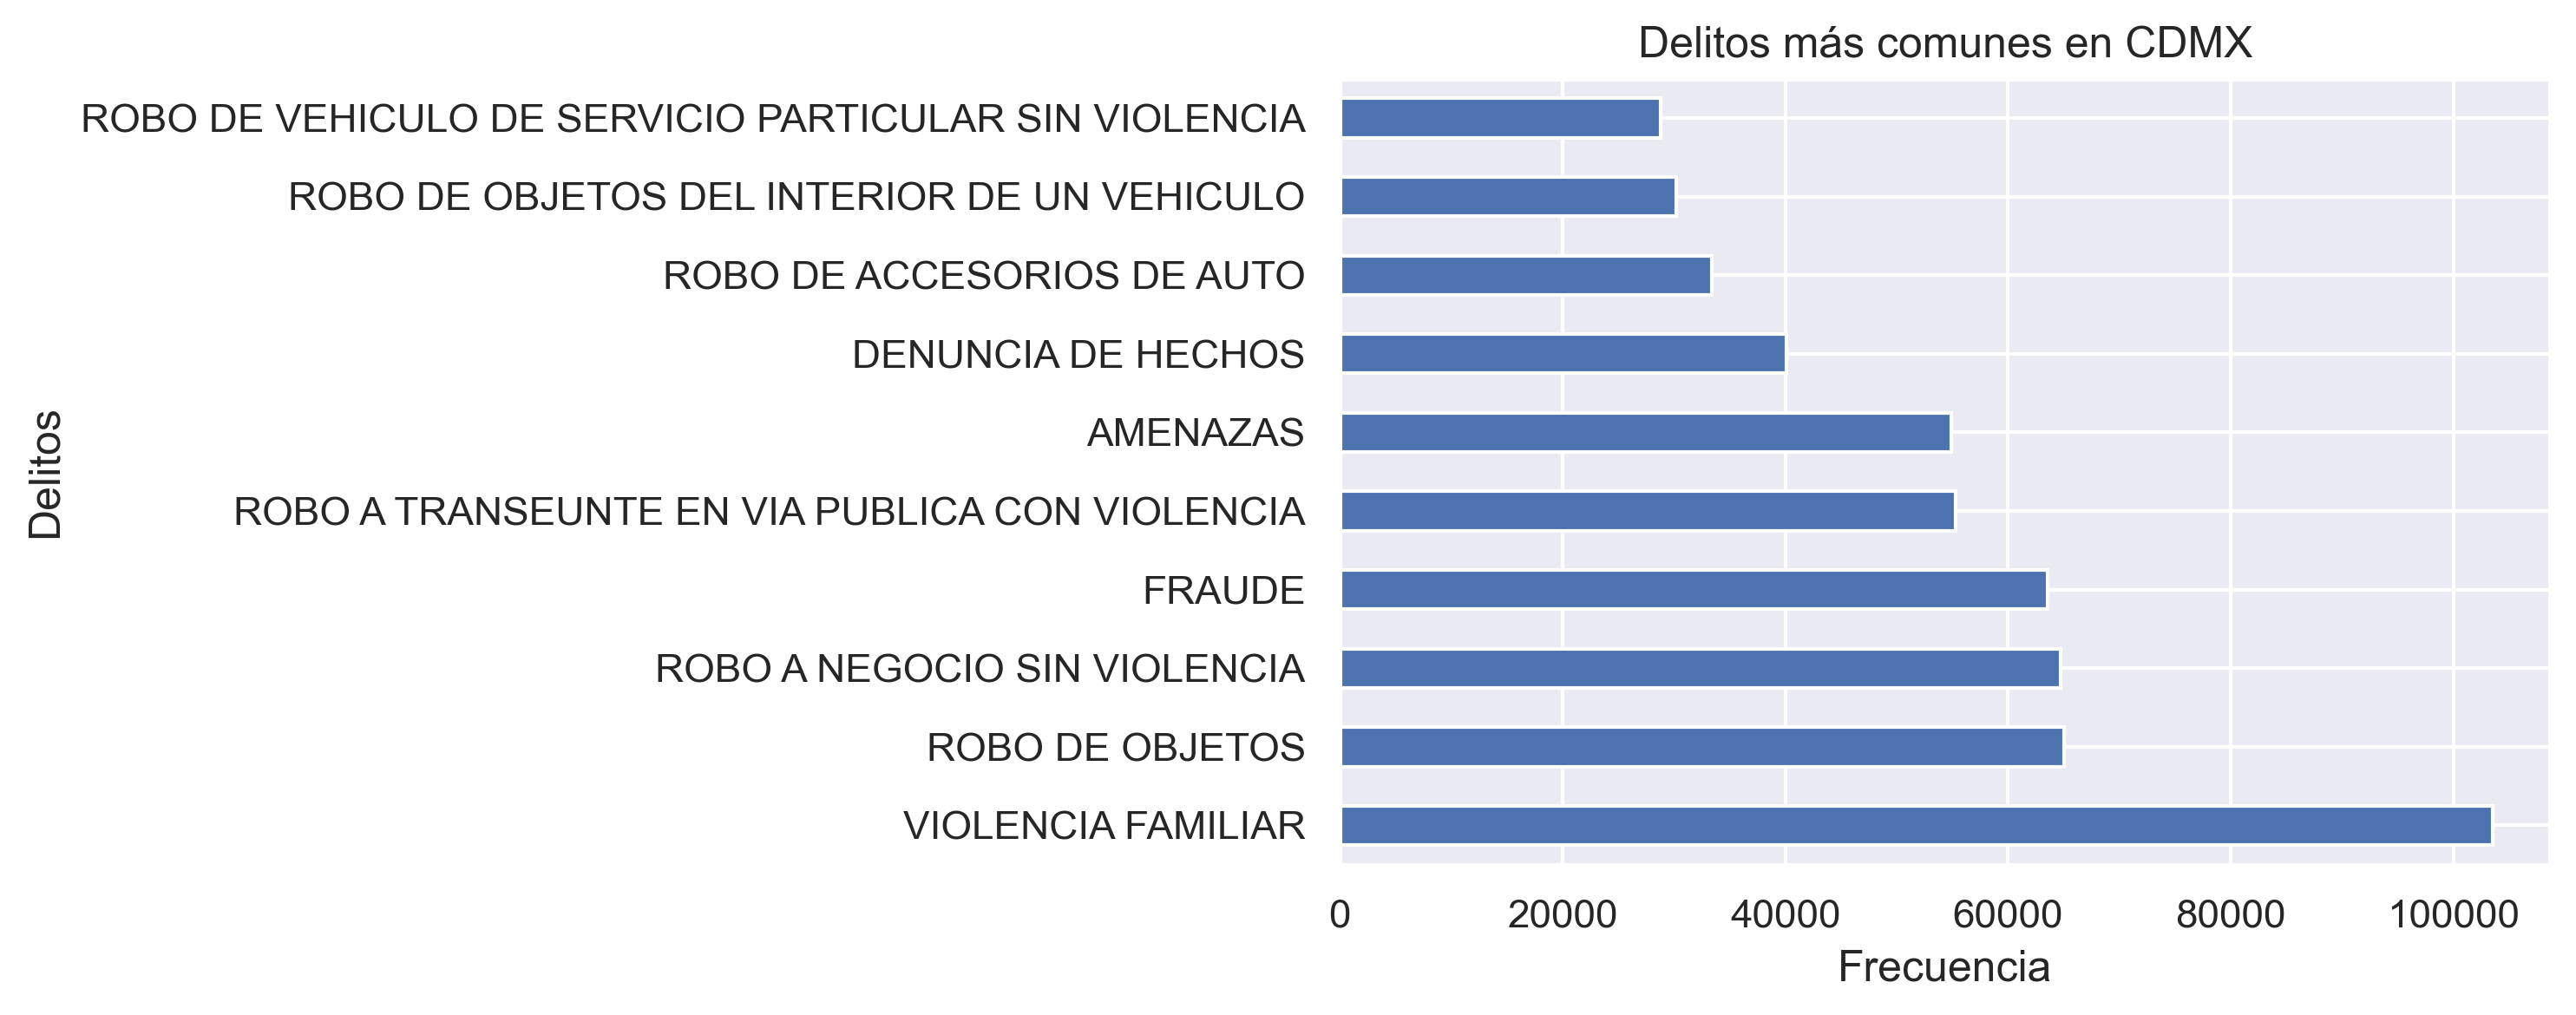

In [13]:
Frecuencia = tiempo_delitos['delito'].value_counts()
Frecuencia = Frecuencia.iloc[0:10]
plot = Frecuencia.plot(kind = 'barh')
plot.set_xlabel('Frecuencia')
plot.set_ylabel('Delitos')
plot.set_title('Delitos más comunes en CDMX', fontsize = 12)

También tenemos los delitos menos frecuentes:

Text(0.5, 1.0, 'Delitos menos comunes en CDMX')

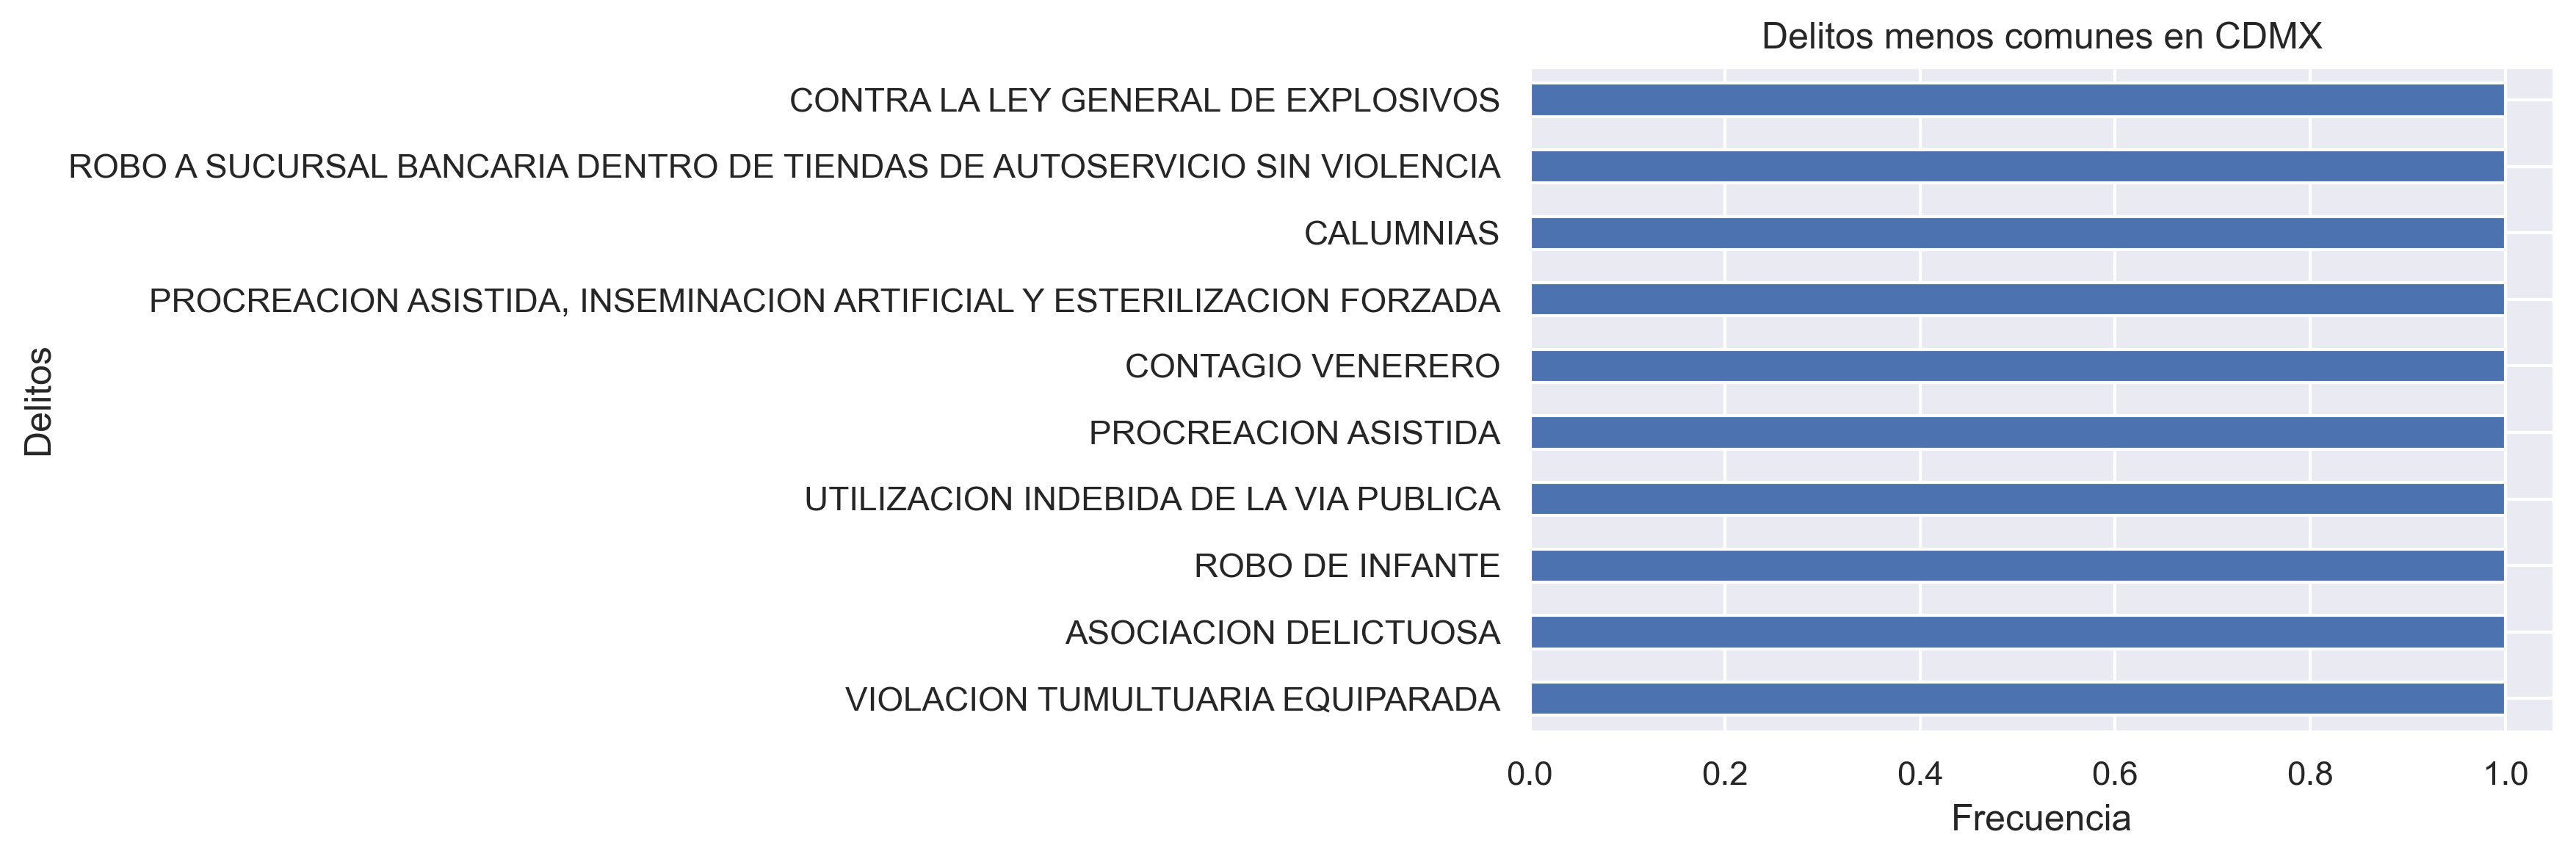

In [14]:
Frecuencia = tiempo_delitos['delito'].value_counts(ascending = True)
Frecuencia = Frecuencia.iloc[0:10]
plot = Frecuencia.plot(kind = 'barh')
plot.set_xlabel('Frecuencia')
plot.set_ylabel('Delitos')
plot.set_title('Delitos menos comunes en CDMX', fontsize = 12)

De esta manera podemos ver que el delito más común, la violencia familiar tiene más de $100\ 000$ registros, mientras que los menos comunes apenas tienen un registro a lo largo del tiempo.

Los cinco delitos más comunes son:

- Violencia Familiar.
- Robo de Objetos.
- Robo a negocio sin violencia.
- Fraude.
- Robo a transeúnte en vía pública con violencia.

**4-** Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias) 

Haremos el análisis desde el $01$ de Octubre de $2019$ hasta el $01$ de Octubre de $2020$. Adicionalente, haremos el análisis semanalmente, de manera que vamos a adicionar una columna con la fecha y el año para cada fecha:

In [15]:
tiempo_delitos['Año/Semana'] = tiempo_delitos['fecha_hechos'].apply(lambda x: '%a-%s' % (x.year, x.week))
tiempo_delitos = tiempo_delitos.set_index('fecha_hechos')

Ahora podemos aislar los datos en el intervalo de interés, y además, puesto que la librería asigna como *'2019-01'* la semana de los dos últimos días del año $2019$, entonces asignamos estos dos días a la primera semana de $2020$:

In [16]:
reciente = tiempo_delitos.loc['2019-09-01':'2020-09-01']
reciente = reciente.sort_index(axis = 0)
reciente['Año/Semana'] = reciente['Año/Semana'].replace('2019-1', '2020-1')

De esta manera, podemos convertir la columna *'Año/Semana'* a una variable temporal de Pandas:

In [17]:
reciente['Año/Semana'] = pd.to_datetime(reciente['Año/Semana'] + '-0', 
                                        format = '%Y-%W-%w')
reciente['delito'] = reciente['delito'].str.replace('Ã‘', 'Ñ')
reciente['delito'] = reciente['delito'].str.replace('Ãš', 'Ú')
reciente['delito'] = reciente['delito'].str.replace('Ã“', 'Ó')

Ésto nos permitirá hacer la frecuencia por semana de todos los delitos en este intervalo de tiempo:

In [18]:
reciente['freq'] = 1
Semana = pd.pivot_table(reciente, index = 'Año/Semana', columns = 'delito', aggfunc = 'count')
Semana.columns = Semana.columns.droplevel(level = 0)
Semana = Semana.fillna(0)
Semana.head()

delito,ABORTO,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",AMENAZAS,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN,...,VIOLACION,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLENCIA FAMILIAR
Año/Semana,,,,,,,,,,,,,,,,,,,,,
2019-09-08,0.0,7.0,19.0,11.0,1.0,0.0,0.0,31.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0
2019-09-15,4.0,35.0,58.0,81.0,17.0,0.0,16.0,275.0,0.0,0.0,...,17.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,505.0
2019-09-22,0.0,48.0,94.0,63.0,15.0,0.0,13.0,271.0,0.0,0.0,...,22.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,459.0
2019-09-29,2.0,37.0,80.0,69.0,22.0,0.0,16.0,301.0,1.0,2.0,...,31.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,0.0,608.0
2019-10-06,2.0,31.0,66.0,81.0,12.0,0.0,20.0,293.0,1.0,3.0,...,30.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,481.0


Utilizaremos el *DataFrame* llamado *Semana* para determinar los delitos que más crecen en la CDMX. Para ello, lo que hacemos es utilizar el paquete de Regresion lineal de **Sci-kit Learn**:

In [19]:
from sklearn.linear_model import LinearRegression
Semana['Valores_x'] = range(Semana.shape[0])

In [20]:
lr = LinearRegression()
Pendientes_list = []
for j in range(Semana.shape[1]):
    lr.fit(Semana['Valores_x'].values.reshape(-1, 1), Semana[Semana.columns[j]])
    Pendientes_list += [lr.coef_[0]]

In [21]:
Regresion = pd.DataFrame(index = Semana.columns, columns = ['Pendientes'])
Regresion['Pendientes'] = Pendientes_list
Regresion = Regresion.drop('Valores_x')
Regresion.sort_values(by = 'Pendientes')

,Pendientes
delito,
ROBO A NEGOCIO SIN VIOLENCIA,-5.630760
ROBO DE OBJETOS,-2.218296
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,-1.897046
ROBO A NEGOCIO CON VIOLENCIA,-1.552087
FRAUDE,-1.399123
...,...
VIOLENCIA FAMILIAR,0.580103
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA),0.718315
ENCUBRIMIENTO,0.823709


Gracias al *DataFrame* llamado *Regresion* podemos ver que el delito que más aumenta es el de "Robo a Negocio sin violencia por farderos (Tiendas de Autoservicio)", seguido por el de "Robo a negocio sin violencia por farderos (Tiendas de conveniencia)", mientras que los delitos que más disminuyen son los de "Robo a negocio sin violencia", seguido por el de "Robo de Objetos": 

In [22]:
Mas_Frecuentes = Semana[['ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)',
                        'ROBO A NEGOCIO CON VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)']]
Menos_Frecuentes = Semana[['ROBO A NEGOCIO SIN VIOLENCIA', 
                           'ROBO DE OBJETOS']]

Text(0, 0.5, 'Frecuencia')

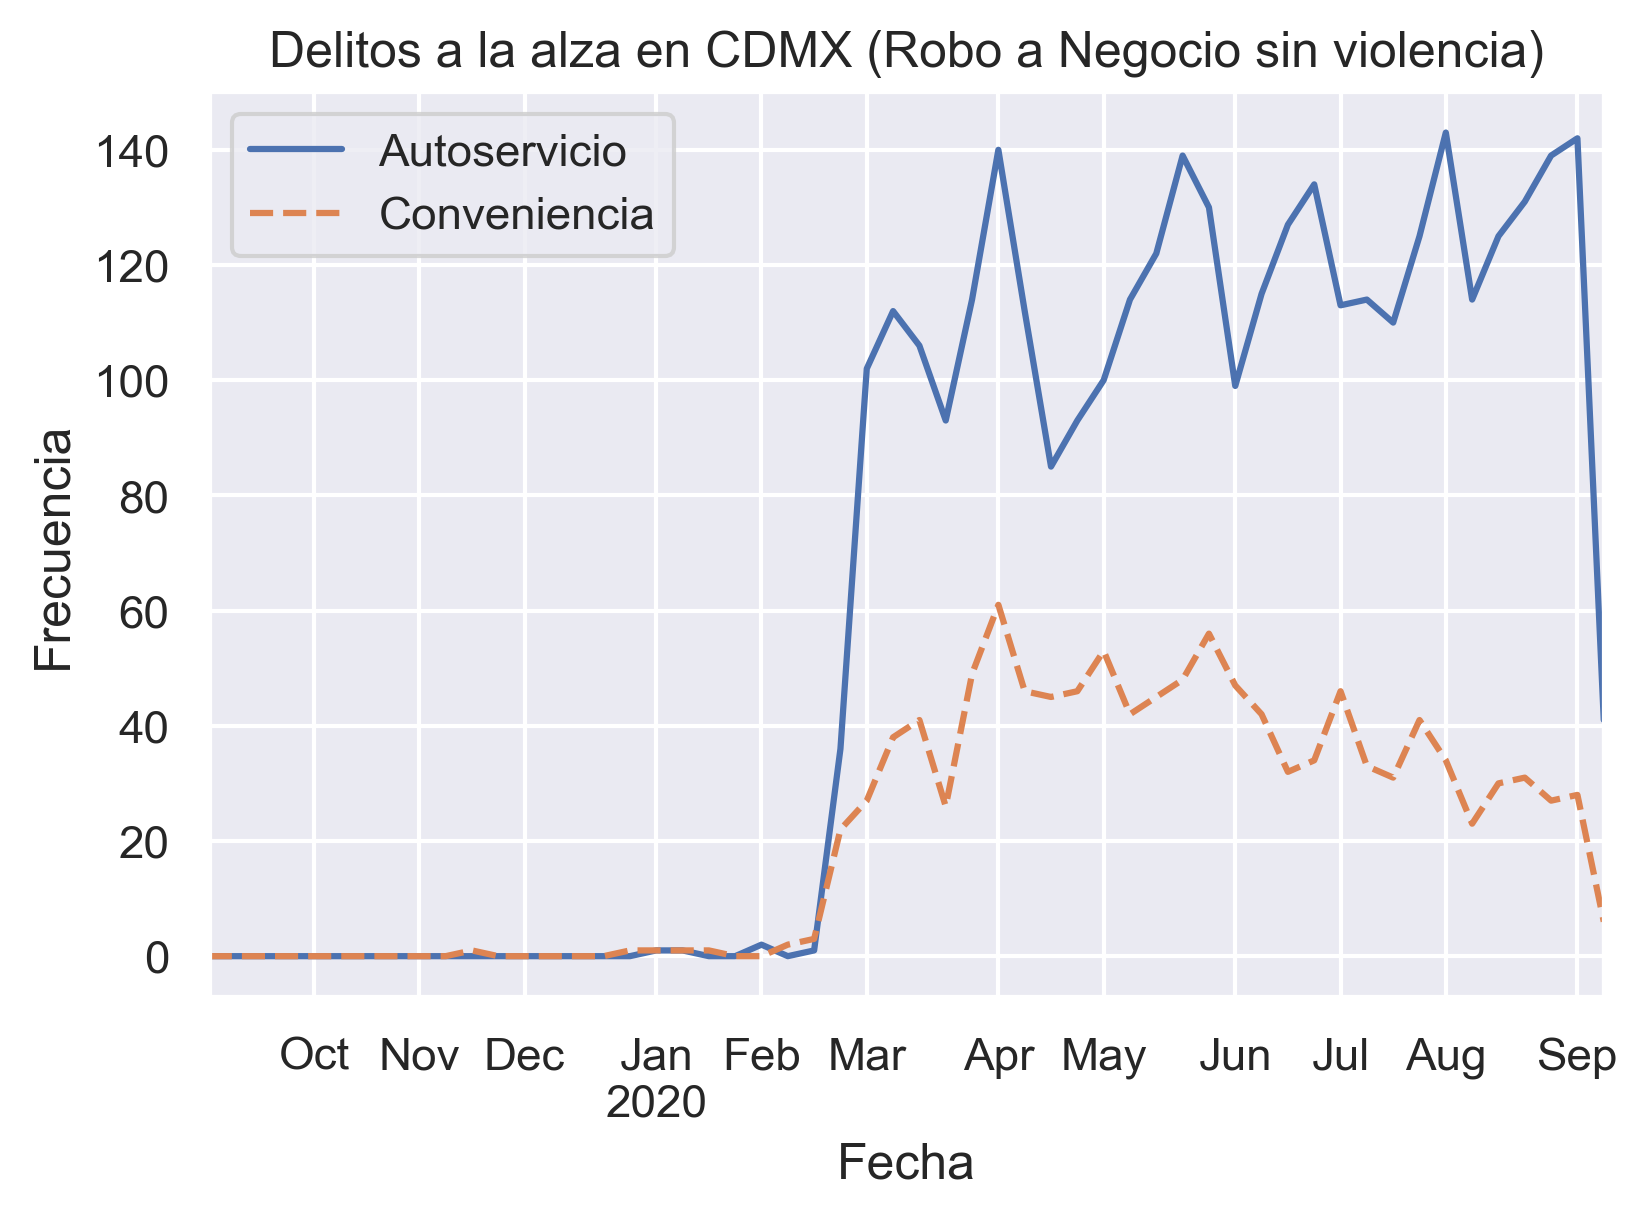

In [23]:
ax = Mas_Frecuentes.plot(style = ['-', '--'])
ax.legend(['Autoservicio', 'Conveniencia'])
ax.set_title('Delitos a la alza en CDMX (Robo a Negocio sin violencia)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

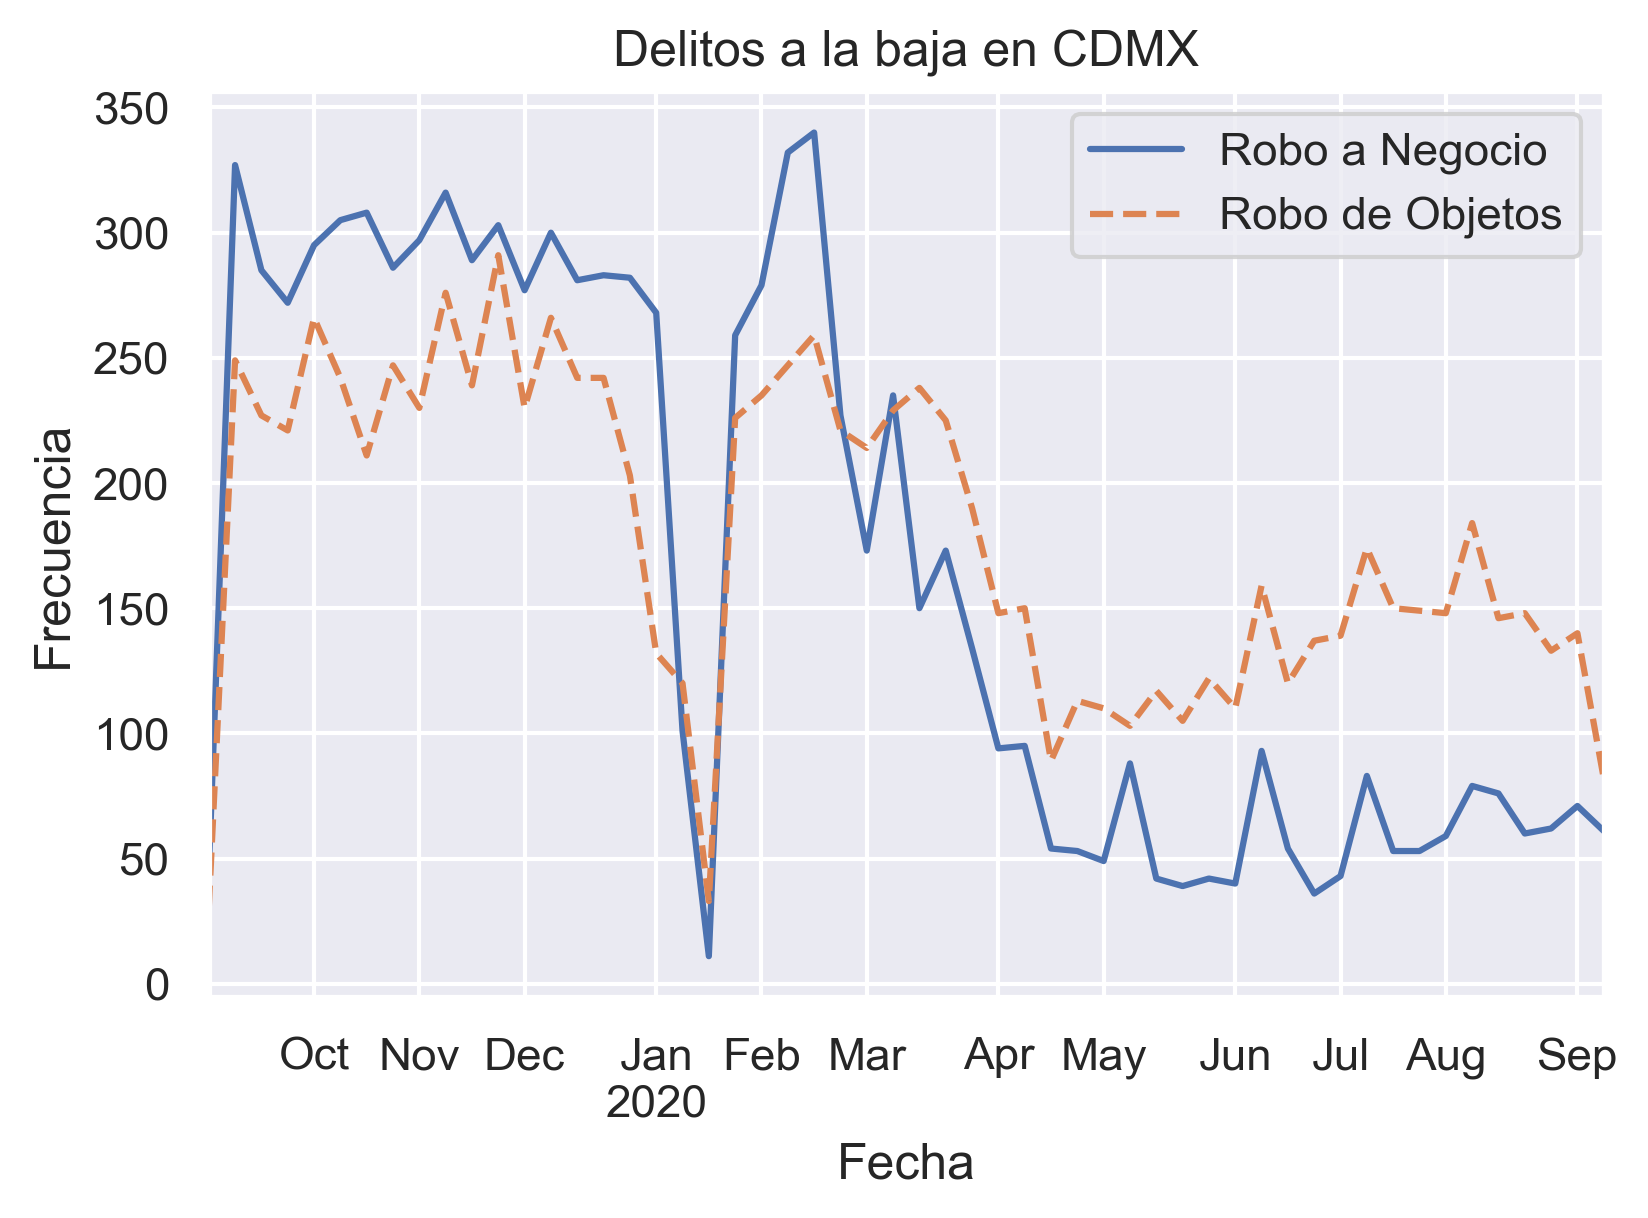

In [24]:
ax = Menos_Frecuentes.plot(style = ['-', '--'])
ax.legend(['Robo a Negocio', 'Robo de Objetos'])
ax.set_title('Delitos a la baja en CDMX')
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')

**5-** ¿Cuál es la alcaldía que más delitos tiene y la que menos? ¿Por qué crees que sea esto?

Para determinar la alcaldía con más delitos utilizamos la función *value_counts*:

In [25]:
Alcaldias = datos_df['alcaldia_hechos'] 
Conteo_Alcaldias = Alcaldias.to_frame().value_counts().to_frame('Frecuencia')
Conteo_Alcaldias.head()

,Frecuencia
alcaldia_hechos,
CUAUHTEMOC,170940
IZTAPALAPA,162469
GUSTAVO A MADERO,108085
BENITO JUAREZ,91470
ALVARO OBREGON,72407


A partir de éstos datos, podemos ver que las alcaldías con más delitos registrados son las alcaldías de *Cuauhtémoc* e *Iztapalapa*. Hay muchas más con apenas un delito: 

In [26]:
Conteo_Alcaldias[Conteo_Alcaldias['Frecuencia'] == 1]

,Frecuencia
alcaldia_hechos,
YURECUARO,1
EL SALTO,1
AGUA DULCE,1
DZILAM DE BRAVO,1
ACULCO,1
...,...
MISANTLA,1
VALLE HERMOSO,1
VALLE DE SANTIAGO,1


De hecho, podemos ver que existen $230$ alcaldías con apenas un delito registrado. Trataremos de encontrar alcaldías con $2$ delitos:

In [27]:
Conteo_Alcaldias[Conteo_Alcaldias['Frecuencia'] == 2]

,Frecuencia
alcaldia_hechos,
CUETZALAN DEL PROGRESO,2
YEHUALTEPEC,2
APAN,2
YURIRIA,2
ZACATELCO,2
...,...
ATLATLAHUCAN,2
ACAMBARO,2
EL CARMEN TEQUEXQUITLA,2


Debido a su posición geográfica, éstas alcaldías corresponden a municipios alrededor de la Ciudad de México ubicados en el Estado de México. Vemos que la proporción de delitos reportados por alcaldía corresponde también a la densidad demográfica de cada una de éstas, lo que explica en primera medida el por qué en las alcaldías de Cuauhtémoc e Iztapalapa se encuentran la mayor cantidad de delitos registrados.

**6-** Dentro de cada Alcaldía, cuáles son las tres colonias con más delitos?

Nos concentraremos solamente en las alcaldías con más delitos, consideraremos las alcaldías de *Cuauhtémoc*, *Iztapalapa* y *Gustavo A. Madero*.

In [28]:
colonias_df = datos_df[['alcaldia_hechos', 'colonia_hechos']]

In [29]:
colonias_df.head()

,alcaldia_hechos,colonia_hechos
0,TLALPAN,JARDINES DEL AJUSCO
1,CUAUHTEMOC,ROMA NORTE
2,XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO
3,CUAUHTEMOC,SAN RAFAEL
4,XOCHIMILCO,BARRIO XALTOCAN


In [30]:
colonias_df[colonias_df['alcaldia_hechos'] == 'CUAUHTEMOC'].value_counts().to_frame('Frecuencia').head()

Frecuencia
alcaldia_hechos colonia_hechos            
CUAUHTEMOC      CENTRO               36526
                DOCTORES             21319
                ROMA NORTE           13262
                JUÁREZ                9039
                BUENAVISTA            8843

Tenemos que para la colonia *Cuauhtémoc* las tres colonias con más delitos son *Centro*, *Doctores* y *Roma Norte*.

In [31]:
colonias_df[colonias_df['alcaldia_hechos'] == 'IZTAPALAPA'].value_counts().to_frame('Frecuencia').head()

Frecuencia
alcaldia_hechos colonia_hechos                            
IZTAPALAPA      CENTRAL DE ABASTO                     7258
                LOMAS DE SAN LORENZO                  4080
                DESARROLLO URBANO QUETZALCOATL        3982
                SANTA CRUZ MEYEHUALCO                 3692
                SANTA MARTHA ACATITLA                 3664

Para el caso de la alcaldía *Iztapalapa*, las colonias con más delitos registrados son *Central de Abasto*, *Lomas de San Lorenzo* y *Desarrollo Urbano Quetzalcoatl*.

In [32]:
colonias_df[colonias_df['alcaldia_hechos'] == 'GUSTAVO A MADERO'].value_counts().to_frame('Frecuencia').head()

Frecuencia
alcaldia_hechos  colonia_hechos                      
GUSTAVO A MADERO LINDAVISTA                      4804
                 GUADALUPE TEPEYAC               4421
                 SAN FELIPE DE JESÚS             3126
                 MAGDALENA DE LAS SALINAS        2523
                 VALLEJO                         2434

Finalmente, para el caso de la Alcadía *Gustavo A. Madero* tenemos que las colonias con más delitos son *Lindavista*, *Guadalupe Tepeyac* y *San Felipe de Jesús*.

**7-** Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

Para dar respuesta a ésta pregunta, obtenemos un nuevo *DataFrame* llamado *Estaciones* para dar cuenta del mes del año, la semana del año, el día de la semana y la quincena:

In [33]:
Estaciones = datos_df[['fecha_hechos', 'mes_hechos']]
Estaciones = Estaciones[Estaciones['fecha_hechos'].notna()]
Estaciones = Estaciones[~Estaciones['fecha_hechos'].isin(['NA NA'])]
Estaciones = Estaciones[~Estaciones['fecha_hechos'].isin(['0000-00-00 00:00:00'])]
Estaciones['fecha_hechos'] = pd.to_datetime(Estaciones['fecha_hechos'], yearfirst = True)
Estaciones['fecha_hechos'] = Estaciones.fecha_hechos.apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
Estaciones['fecha_hechos'] = pd.to_datetime(Estaciones['fecha_hechos'], format = '%Y-%m-%d %H:%M:%S')

C:\Users\dalan\anaconda3\envs\Packages\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [34]:
Estaciones['mes'] = Estaciones['fecha_hechos'].apply(lambda x: x.month) # Enero = 1 hasta Diciembre = 12
Estaciones['Semana'] = Estaciones['fecha_hechos'].apply(lambda x: x.week)
Estaciones['Dia'] = Estaciones['fecha_hechos'].apply(lambda x: x.dayofweek) # Monday = 0 until Sunday = 6
s =  np.where(Estaciones['fecha_hechos'].dt.day < 15, '1 Quincena', '2 Quincena')
Estaciones['Quincena'] = s
Estaciones = Estaciones.set_index('fecha_hechos')
Estaciones.head()

,mes_hechos,mes,Semana,Dia,Quincena
fecha_hechos,,,,,
2016-04-12 04:30:00,Abril,4,15,1,1 Quincena
2015-03-25 12:00:00,Marzo,3,13,2,2 Quincena
2016-04-12 05:00:00,Abril,4,15,1,1 Quincena
2016-04-06 03:54:00,Abril,4,14,2,1 Quincena
2015-12-26 12:00:00,Diciembre,12,52,5,2 Quincena


Ahora podemos hacer una discriminación de delitos por sus frecuencias en meses del año:

Text(0.5, 0, 'Mes')

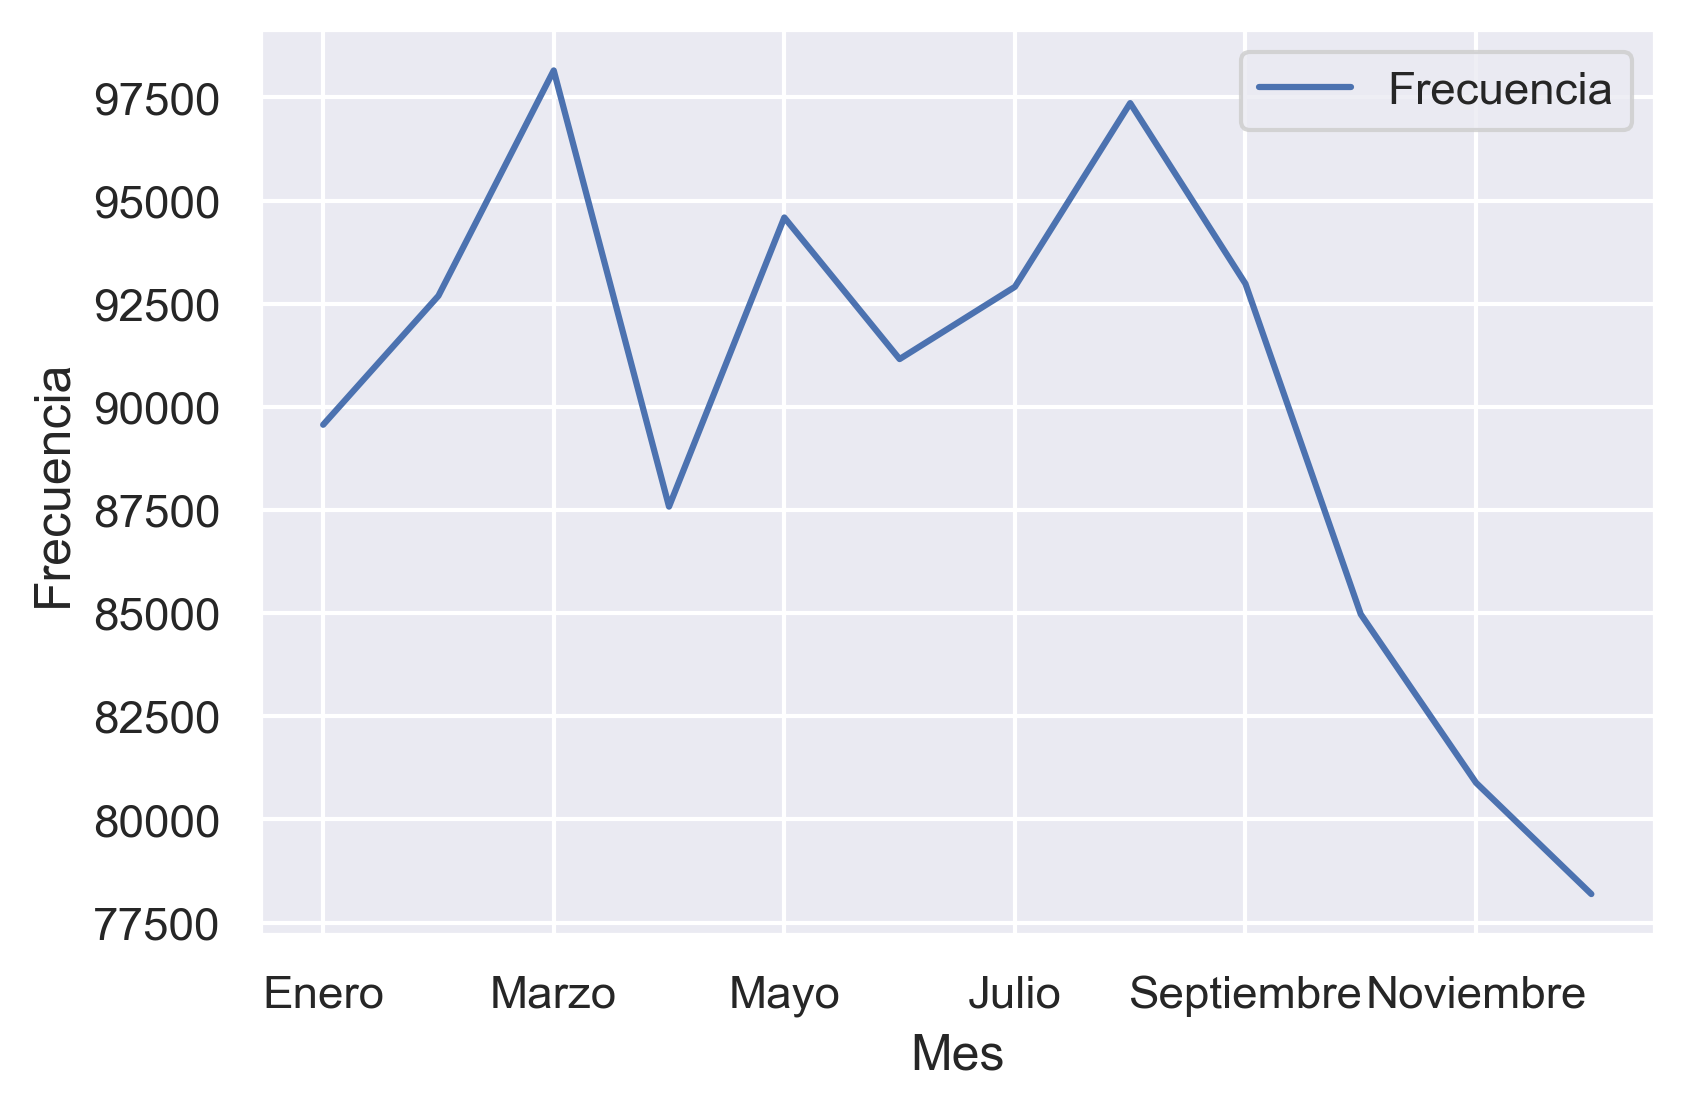

In [35]:
Mes = Estaciones['mes'].value_counts().to_frame('Frecuencia')
Meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo','Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
Mes = Mes.sort_index()
Mes.index = Meses
Mes_plot = Mes.plot()
Mes_plot.set_ylabel('Frecuencia')
Mes_plot.set_xlabel('Mes')

Encontramos que los meses en donde más se realizan delitos son en Marzo y Agosto, con un pico en Mayo, y el mes en donde se cometen menos delitos es en Diciembre. Ahora verificaremos la distribución por semana:

Text(0.5, 0, 'Semana')

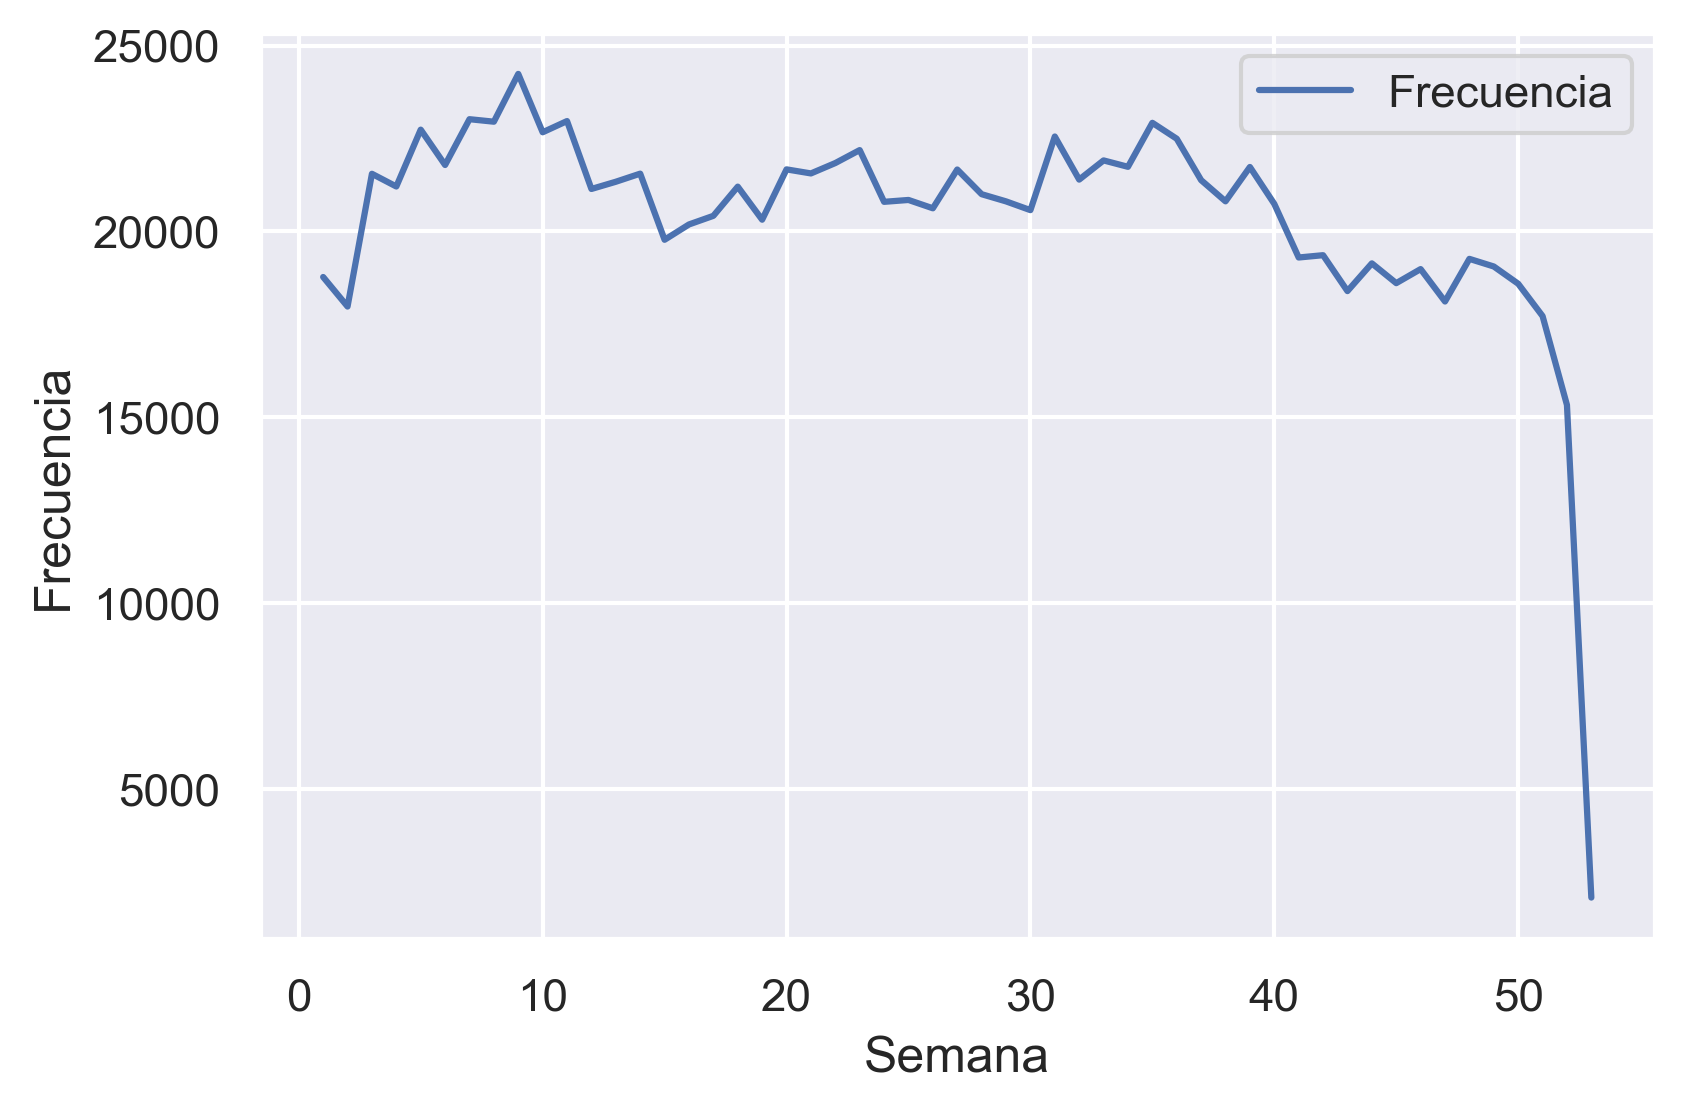

In [36]:
Semanal = Estaciones['Semana'].value_counts().to_frame('Frecuencia')
Semanal = Semanal.sort_index()
Semanal_plot = Semanal.plot()
Semanal_plot.set_ylabel('Frecuencia')
Semanal_plot.set_xlabel('Semana')

A partir de esta gráfica podemos ver que la distribución de delitos por semana es mucho más estable en comparación a la de los meses del año, a exepción de las últimas semanas de éste, en donde se reducen drásticamente en el cambio de año. Continuamos el análisis con los días de la semana:

Text(0.5, 0, 'Día de la Semana')

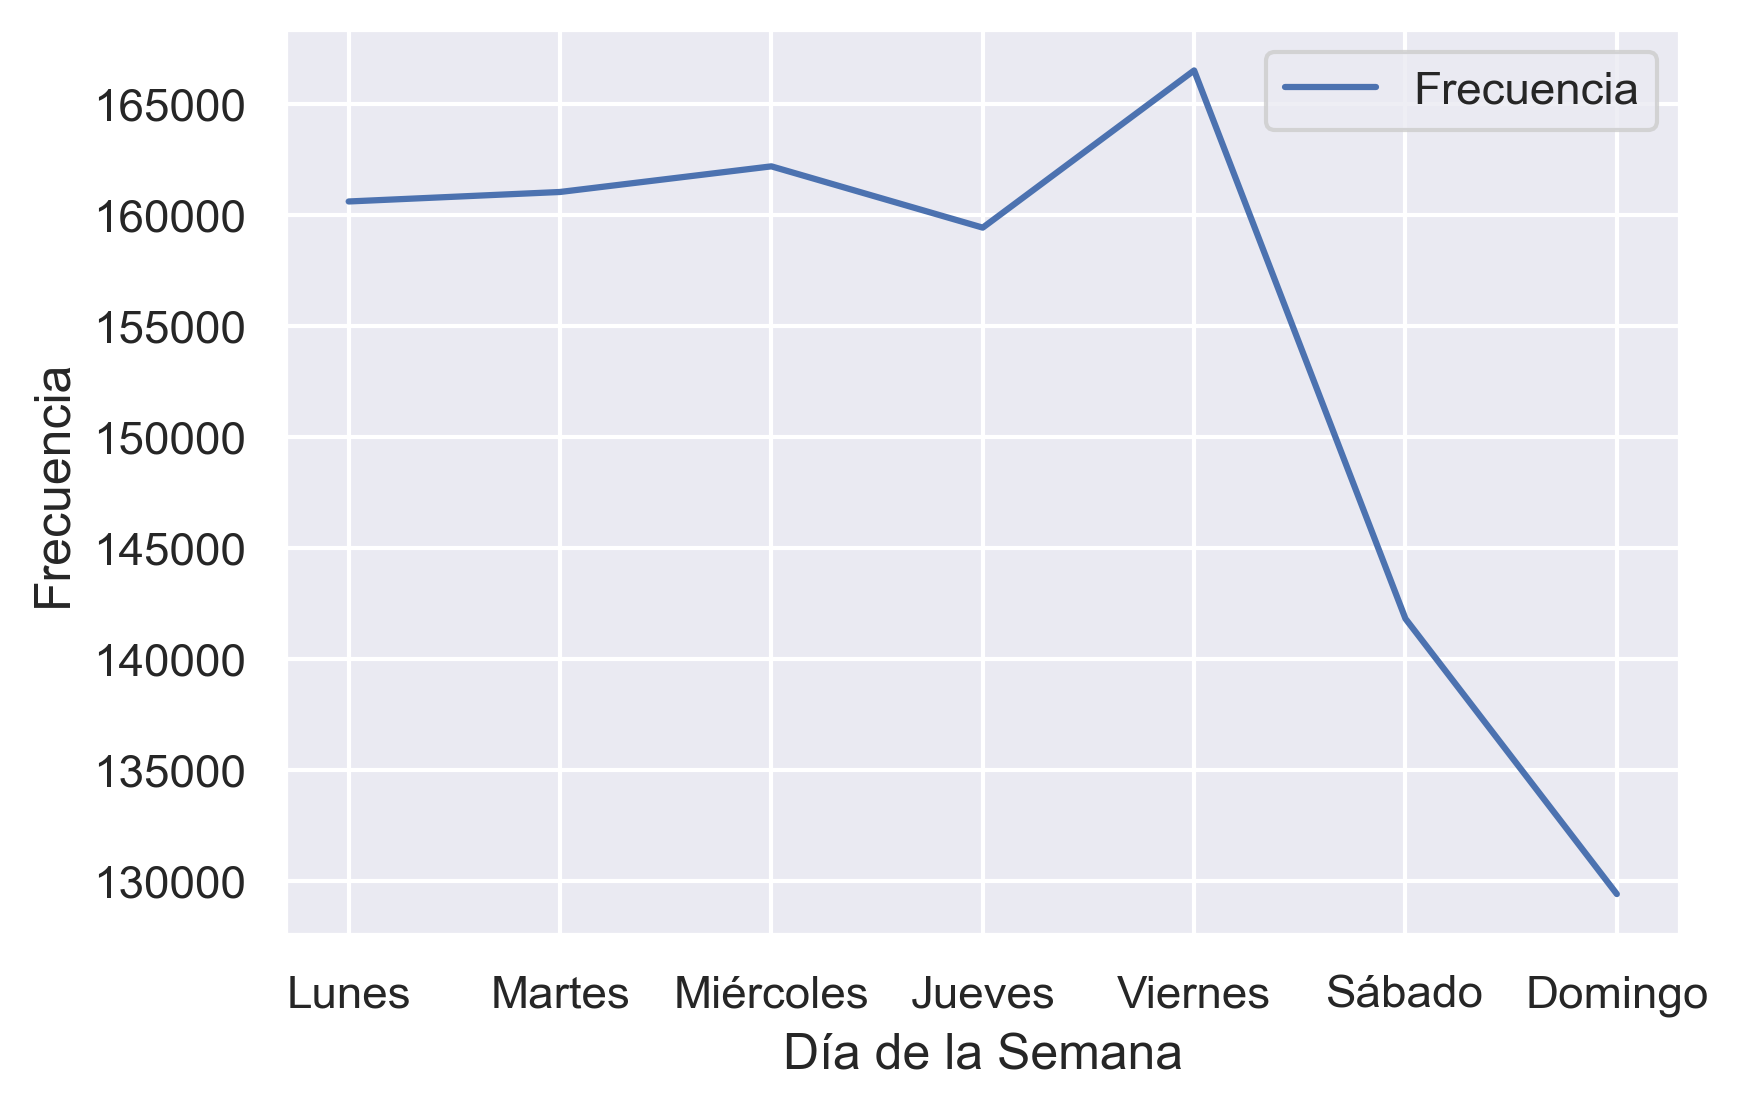

In [37]:
Dia = Estaciones['Dia'].value_counts().to_frame('Frecuencia')
Dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
Dia = Dia.sort_index()
Dia.index = Dias
Dia_plot = Dia.plot()
Dia_plot.set_ylabel('Frecuencia')
Dia_plot.set_xlabel('Día de la Semana')

Ésta gráfica nos permite ver que el pico de delitos ocurre en los días viernes mientras que los días sábado y domingo es cuando se cometen menos delitos. 

Text(0.5, 0, 'Quincena')

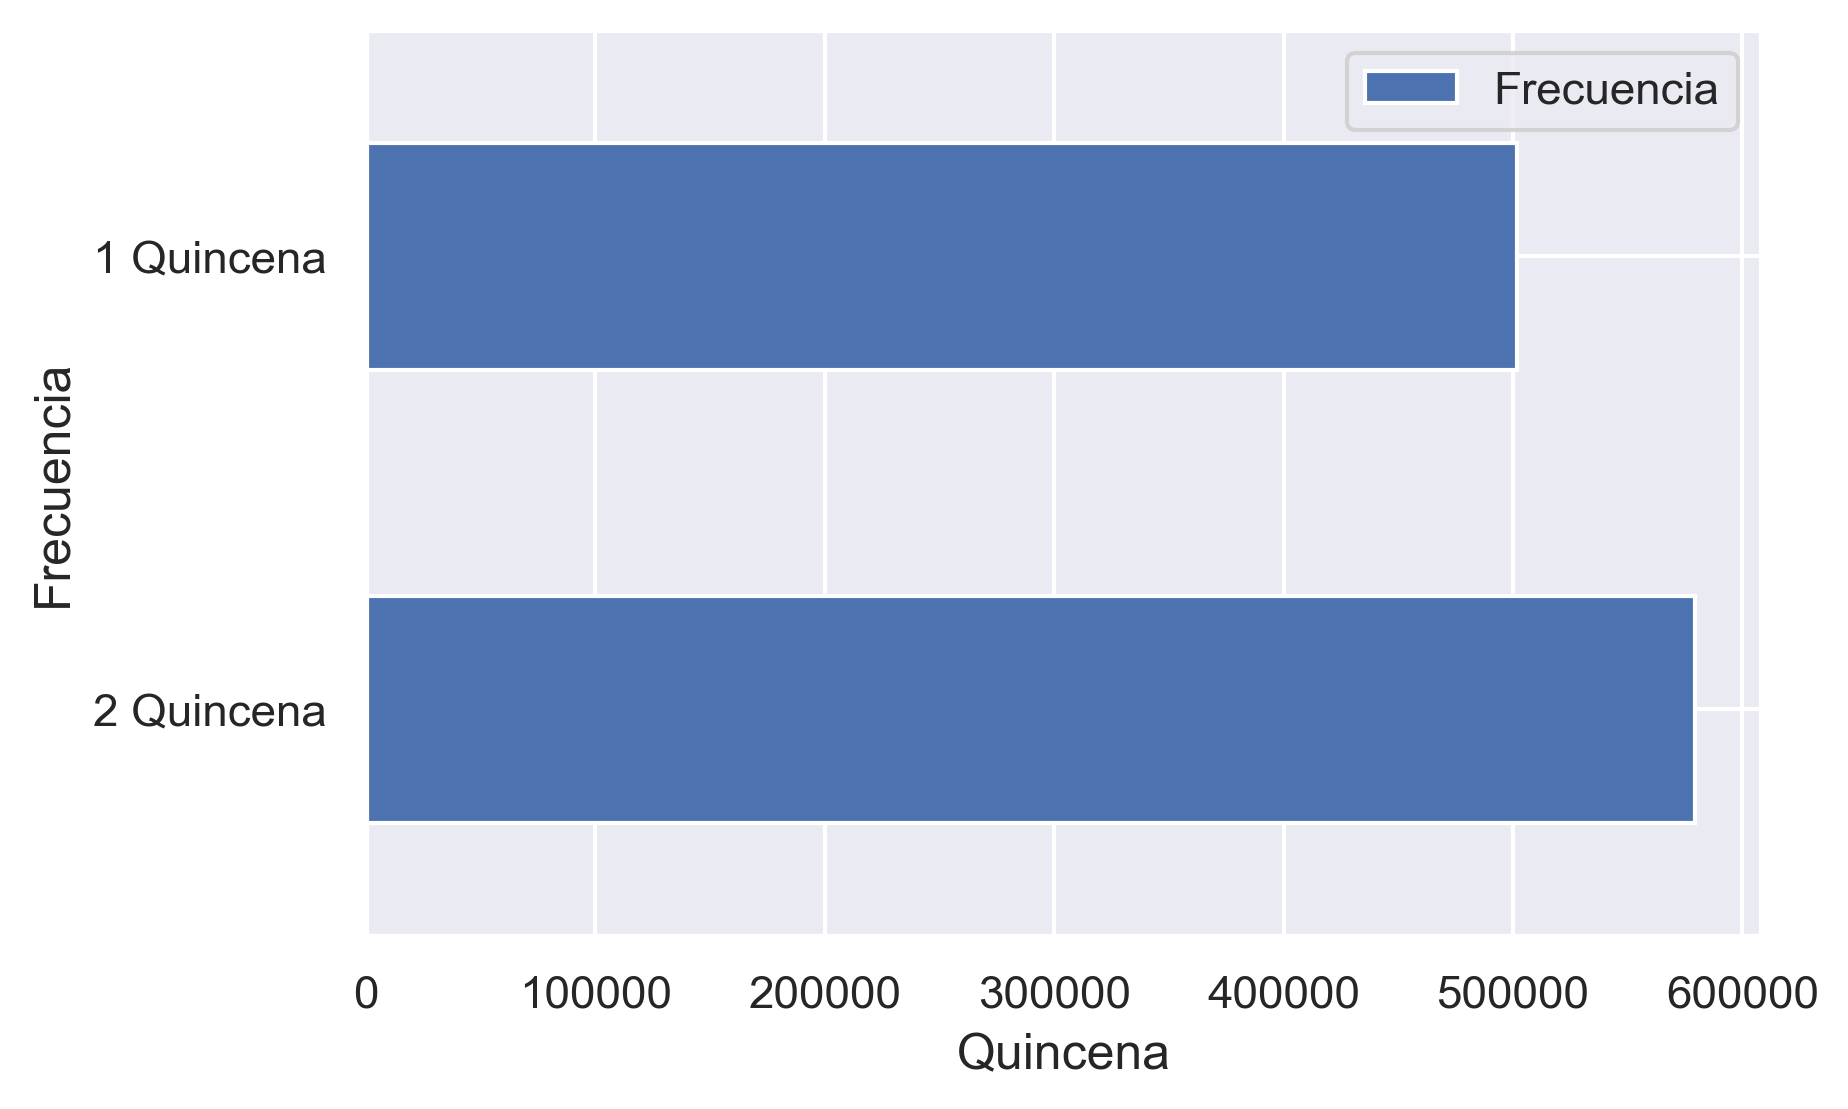

In [38]:
Quincena = Estaciones['Quincena'].value_counts().to_frame('Frecuencia')
Quincena_plot = Quincena.plot(kind = 'barh')
Quincena_plot.set_ylabel('Frecuencia')
Quincena_plot.set_xlabel('Quincena')

De manera muy general tenemos que es en la segunda quincena de cada mes que más se comenten delitos en la Ciudad de México.

**8-** ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia que en las demás.

Para poder responder a ésta pregunta, tomamos los datos de los delitos y las alcaldías a partir de los datos originales: 

In [39]:
Delitos_Alcaldias = datos_df[['delito', 'alcaldia_hechos', 'categoria_delito']]
Delitos_Alcaldias.head()

,delito,alcaldia_hechos,categoria_delito
0,ROBO A CASA HABITACION SIN VIOLENCIA,TLALPAN,DELITO DE BAJO IMPACTO
1,DENUNCIA DE HECHOS,CUAUHTEMOC,HECHO NO DELICTIVO
2,DAÑO EN PROPIEDAD AJENA CULPOSA,XOCHIMILCO,DELITO DE BAJO IMPACTO
3,AMENAZAS,CUAUHTEMOC,DELITO DE BAJO IMPACTO
4,VIOLENCIA FAMILIAR,XOCHIMILCO,DELITO DE BAJO IMPACTO


Ahora, hacemos un conteo con estos datos para discriminar en cuáles alcaldías se comenten los delitos:

In [40]:
Alcaldias = Delitos_Alcaldias['alcaldia_hechos'].value_counts().to_frame('Frecuencia')
Alcaldias = list(Alcaldias.index[0:16])
Delitos_Alcaldias = pd.pivot_table(Delitos_Alcaldias, 
                                   index = 'alcaldia_hechos', 
                                   columns = 'delito',
                                   aggfunc = 'count')

Delitos_Alcaldias.columns = Delitos_Alcaldias.columns.droplevel(level = 0)
Delitos_Alcaldias = Delitos_Alcaldias.fillna(0)
Delitos_Alcaldias = Delitos_Alcaldias.loc[Alcaldias, :]
Delitos_Alcaldias.head()

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,ALLANAMIENTO DE MORADA,"ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL",...,VIOLACION DE CORRESPONDENCIA,VIOLACION DE LA INTIMIDAD,VIOLACION EQUIPARADA,VIOLACION EQUIPARADA POR CONOCIDO,VIOLACION EQUIPARADA Y ROBO DE VEHICULO,VIOLACION TUMULTUARIA,VIOLACION TUMULTUARIA EQUIPARADA,VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,VIOLACION Y ROBO DE VEHICULO,VIOLENCIA FAMILIAR
alcaldia_hechos,,,,,,,,,,,,,,,,,,,,,
CUAUHTEMOC,652.0,32.0,1291.0,756.0,2879.0,1986.0,573.0,21.0,210.0,157.0,...,12.0,1.0,122.0,9.0,3.0,27.0,1.0,1.0,0.0,8302.0
IZTAPALAPA,290.0,101.0,854.0,827.0,2017.0,2092.0,312.0,19.0,312.0,197.0,...,10.0,1.0,112.0,13.0,1.0,19.0,0.0,0.0,0.0,19078.0
GUSTAVO A MADERO,203.0,84.0,463.0,316.0,1579.0,1471.0,255.0,7.0,223.0,170.0,...,10.0,0.0,56.0,6.0,0.0,8.0,0.0,0.0,0.0,11816.0
BENITO JUAREZ,173.0,18.0,164.0,176.0,2273.0,606.0,163.0,2.0,178.0,114.0,...,24.0,0.0,40.0,0.0,0.0,6.0,0.0,0.0,0.0,3927.0
ALVARO OBREGON,141.0,65.0,155.0,218.0,1183.0,940.0,167.0,4.0,169.0,110.0,...,2.0,0.0,53.0,7.0,1.0,7.0,0.0,0.0,1.0,7635.0


In [41]:
DelitosFrecuentes = pd.DataFrame(index = Delitos_Alcaldias.index, columns = ['1°', '2°', '3°', '4°', '5°'])

In [42]:
for i in range(DelitosFrecuentes.shape[0]):
    df = Delitos_Alcaldias.iloc[i].to_frame('Frecuencia').sort_values(by = 'Frecuencia', ascending = False).reset_index()
    df['Frecuencia'] = df['delito'] + ' ' + df['Frecuencia'].astype(str)
    DelitosFrecuentes.iloc[i, :] = df['Frecuencia'].to_list()[0:5]

La siguiente tabla nos muestra los delitos más comunes para las $5$ primeras delegaciones en cuanto a delitos.

In [43]:
DelitosFrecuentes.head()

,1°,2°,3°,4°,5°
alcaldia_hechos,,,,,
CUAUHTEMOC,FRAUDE 16442.0,ROBO DE OBJETOS 12665.0,ROBO A NEGOCIO SIN VIOLENCIA 10405.0,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA...,DENUNCIA DE HECHOS 8558.0
IZTAPALAPA,VIOLENCIA FAMILIAR 19078.0,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA...,ROBO A NEGOCIO SIN VIOLENCIA 10099.0,AMENAZAS 8781.0,ROBO DE OBJETOS 8533.0
GUSTAVO A MADERO,VIOLENCIA FAMILIAR 11816.0,ROBO A NEGOCIO SIN VIOLENCIA 6875.0,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA...,AMENAZAS 5466.0,ROBO DE OBJETOS 5241.0
BENITO JUAREZ,FRAUDE 8708.0,ROBO A NEGOCIO SIN VIOLENCIA 7607.0,ROBO DE ACCESORIOS DE AUTO 7289.0,ROBO DE OBJETOS 5634.0,VIOLENCIA FAMILIAR 3927.0
ALVARO OBREGON,VIOLENCIA FAMILIAR 7635.0,ROBO A NEGOCIO SIN VIOLENCIA 4194.0,ROBO DE OBJETOS 3892.0,AMENAZAS 3820.0,FRAUDE 3773.0


Ésta tabla nos ayuda a caracterizar cada delegación por su respectivo delito, pues de esta manera vemos que el delito que caracteriza a la delegación Cuauhtémoc es el de Fraude, mientras que el que caracteriza a la delegación Iztapalapa es la violencia Familiar, así como a la delegación Benito Juárez el delito que la caracteriza es el de Robo a Negocio sin violencia, asimismo a la delegación Álvaro Obregón la caracteriza el Robo a Objetos, finalmente, a la delegación Gustavo A. Madero la caracteriza el Robo a transeúnte en vía pública con violencia. 

**9-** Calcula el número de homicidios dolosos por cada $100$ mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI (Pista: No importa que el dato de población no esté actualizado).
    **a)** Pinta un mapa con este indicador. Describe los resultados.

Lo primero que hacemos es determinar las caldas con la categería de delito: "Homicidio doloso" a partir del *DataFrame* *datos_df*:

In [44]:
Indices = datos_df['delito'][datos_df['categoria_delito'].str.contains('HOMICIDIO DOLOSO')].index
homicidios_df = datos_df.iloc[Indices, :]
homicidios_df = homicidios_df[homicidios_df['fecha_hechos'].notna()]
homicidios_df = homicidios_df[~homicidios_df['fecha_hechos'].isin(['NA NA'])]
homicidios_df = homicidios_df[~homicidios_df['fecha_hechos'].isin(['0000-00-00 00:00:00'])]
homicidios_df['fecha_hechos'] = homicidios_df['fecha_hechos'].str.replace('/', '-')
homicidios_df['fecha_hechos'] = pd.to_datetime(homicidios_df['fecha_hechos'], yearfirst = True)
homicidios_df['fecha_hechos'] = homicidios_df.fecha_hechos.apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
homicidios_df['fecha_hechos'] = pd.to_datetime(homicidios_df['fecha_hechos'], format = '%Y-%m-%d %H:%M:%S')
homicidios_df = homicidios_df.set_index('fecha_hechos')
homicidios_df = homicidios_df.loc['2019-09-01':'2020-09-01']
homicidios_df = homicidios_df[['alcaldia_hechos', 'colonia_hechos', 'latitud', 'longitud']]
homicidios_df = homicidios_df.sort_index()
homicidios_df = homicidios_df.dropna()
homicidios_df.head()

C:\Users\dalan\anaconda3\envs\Packages\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,alcaldia_hechos,colonia_hechos,latitud,longitud
fecha_hechos,,,,
2019-09-01 20:50:00,GUSTAVO A MADERO,PROVIDENCIA,19.48248,-99.06720
2019-09-01 22:40:00,IZTAPALAPA,LOMAS DE SAN LORENZO,19.31770,-99.06126
2019-09-01 23:55:00,GUSTAVO A MADERO,SAN JUAN DE ARAGÓN I SECCIÓN,19.45792,-99.08842
2019-09-02 01:00:00,IZTAPALAPA,SANTA MARÍA TOMATLÁN,19.32364,-99.09949
2019-09-02 01:00:00,IZTAPALAPA,SAN LORENZO,19.30498,-99.06931


In [45]:
HomicidiosPosicion_df = homicidios_df.value_counts(['latitud', 'longitud']).to_frame('Frecuencia').reset_index()
HomicidiosPosicion_df['Posicion'] = HomicidiosPosicion_df.apply(lambda x: (x.latitud, x.longitud), axis=1)
HomicidiosPosicion_df = HomicidiosPosicion_df.drop('latitud', axis = 1)
HomicidiosPosicion_df = HomicidiosPosicion_df.drop('longitud', axis = 1)
HomicidiosPosicion_df.head()

,Frecuencia,Posicion
0,2,"(19.34441, -99.02795)"
1,2,"(19.3739787958867, -99.09052969971809)"
2,2,"(19.37398, -99.09053)"
3,1,"(19.3357332442662, -99.1172146796995)"
4,1,"(19.3363008360718, -99.0993505771179)"


Adicionalmente obtenemos la información de las Áreas Geoestadísticas básicas del INEGI a partir de su página de Internet: *https://www.inegi.org.mx/app/ageeml/#*:

In [46]:
AGEB_df = pd.read_csv("AGEEML_2020102867703.csv")

C:\Users\dalan\anaconda3\envs\Packages\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
Indices = AGEB_df['Nom_Ent'][AGEB_df['Nom_Ent'].str.contains('Ciudad de México')].index
AGEB_df = AGEB_df.iloc[Indices, :]
AGEB_df = AGEB_df[['Nom_Mun', 'Nom_Loc', 'Pob_Total', 'Lat_Decimal', 'Lon_Decimal']]
AGEB_df['Nom_Mun'] = AGEB_df['Nom_Mun'].str.upper().str.replace('Á', 'A').str.replace('É', 'E')
AGEB_df['Nom_Loc'] = AGEB_df['Nom_Loc'].str.upper().str.replace('Á', 'A').str.replace('É', 'E')
#AGEB_df['freq'] = 1
AGEB_df.head()

,Nom_Mun,Nom_Loc,Pob_Total,Lat_Decimal,Lon_Decimal
83200,AZCAPOTZALCO,AZCAPOTZALCO,414711,19.484103,-99.184361
83201,COYOACAN,COYOACAN,620416,19.350214,-99.162146
83202,CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,160491,19.357350,-99.299792
83203,CUAJIMALPA DE MORELOS,CRUZ BLANCA,581,19.317785,-99.324010
83204,CUAJIMALPA DE MORELOS,SAN LORENZO ACOPILCO,23037,19.331005,-99.325682


In [48]:
AGEB_df['Pob_Total'][(AGEB_df['Pob_Total'] == '0') | (AGEB_df['Pob_Total'] == '-')] = '10'

C:\Users\dalan\anaconda3\envs\Packages\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
AGEB_df.head()

,Nom_Mun,Nom_Loc,Pob_Total,Lat_Decimal,Lon_Decimal
83200,AZCAPOTZALCO,AZCAPOTZALCO,414711,19.484103,-99.184361
83201,COYOACAN,COYOACAN,620416,19.350214,-99.162146
83202,CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,160491,19.357350,-99.299792
83203,CUAJIMALPA DE MORELOS,CRUZ BLANCA,581,19.317785,-99.324010
83204,CUAJIMALPA DE MORELOS,SAN LORENZO ACOPILCO,23037,19.331005,-99.325682


In [50]:
AGEB_df.shape

(724, 5)

In [51]:
AGEB_df['Posicion'] = AGEB_df.apply(lambda x: (x.Lat_Decimal, x.Lon_Decimal), axis=1)
AGEB_df.head()

,Nom_Mun,Nom_Loc,Pob_Total,Lat_Decimal,Lon_Decimal,Posicion
83200,AZCAPOTZALCO,AZCAPOTZALCO,414711,19.484103,-99.184361,"(19.484103, -99.184361)"
83201,COYOACAN,COYOACAN,620416,19.350214,-99.162146,"(19.350214, -99.162146)"
83202,CUAJIMALPA DE MORELOS,CUAJIMALPA DE MORELOS,160491,19.357350,-99.299792,"(19.35735, -99.299792)"
83203,CUAJIMALPA DE MORELOS,CRUZ BLANCA,581,19.317785,-99.324010,"(19.317785, -99.32401)"
83204,CUAJIMALPA DE MORELOS,SAN LORENZO ACOPILCO,23037,19.331005,-99.325682,"(19.331005, -99.325682)"


Puesto que las fuentes de las que obtuvimos los datos son diferentes, haremos la conjunción de ambos *DataFrames* para el cálculo del número de homicidios por cada $100$ mil habitantes:

In [52]:
from scipy.spatial.distance import cdist
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

In [53]:
Posiciones_AGEB = AGEB_df['Posicion'].to_list()

In [54]:
HomicidiosPosicion_df['AGEB_Posicion'] = HomicidiosPosicion_df.apply(lambda x: closest_point(x.Posicion, Posiciones_AGEB), 
                                                                    axis = 1)

In [55]:
HomicidiosPosicion_df.head()

,Frecuencia,Posicion,AGEB_Posicion
0,2,"(19.34441, -99.02795)","(19.319274, -99.024965)"
1,2,"(19.3739787958867, -99.09052969971809)","(19.359004, -99.092623)"
2,2,"(19.37398, -99.09053)","(19.359004, -99.092623)"
3,1,"(19.3357332442662, -99.1172146796995)","(19.359004, -99.092623)"
4,1,"(19.3363008360718, -99.0993505771179)","(19.359004, -99.092623)"


In [56]:
HomicidiosPosicion_df['AGEB'] = HomicidiosPosicion_df['AGEB_Posicion'].map(AGEB_df.set_index('Posicion')['Nom_Mun'])
HomicidiosPosicion_df['Poblacion'] = HomicidiosPosicion_df['AGEB_Posicion'].map(AGEB_df.set_index('Posicion')['Pob_Total'])
HomicidiosPosicion_df['Poblacion'] = pd.to_numeric(HomicidiosPosicion_df['Poblacion'], errors = 'coerce').to_frame('Pob')['Pob'].to_list()
HomicidiosPosicion_df['Homicidios por 100mil hab.'] = HomicidiosPosicion_df['Frecuencia'] * 100000 / HomicidiosPosicion_df['Poblacion']
HomicidiosPosicion_df = HomicidiosPosicion_df[HomicidiosPosicion_df['Homicidios por 100mil hab.'] < 2] 
HomicidiosPosicion_df.head()

,Frecuencia,Posicion,AGEB_Posicion,AGEB,Poblacion,Homicidios por 100mil hab.
1,2,"(19.3739787958867, -99.09052969971809)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.110145
2,2,"(19.37398, -99.09053)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.110145
3,1,"(19.3357332442662, -99.1172146796995)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073
4,1,"(19.3363008360718, -99.0993505771179)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073
8,1,"(19.337765118317197, -99.11840341916279)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073


In [57]:
HomicidiosPosicion_df[['Longitud', 'Latitud']] = pd.DataFrame(HomicidiosPosicion_df['AGEB_Posicion'].tolist(), 
                                                              index=HomicidiosPosicion_df.index)  

In [58]:
HomicidiosPosicion_df.head()

,Frecuencia,Posicion,AGEB_Posicion,AGEB,Poblacion,Homicidios por 100mil hab.,Longitud,Latitud
1,2,"(19.3739787958867, -99.09052969971809)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.110145,19.359004,-99.092623
2,2,"(19.37398, -99.09053)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.110145,19.359004,-99.092623
3,1,"(19.3357332442662, -99.1172146796995)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073,19.359004,-99.092623
4,1,"(19.3363008360718, -99.0993505771179)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073,19.359004,-99.092623
8,1,"(19.337765118317197, -99.11840341916279)","(19.359004, -99.092623)",IZTAPALAPA,1815786,0.055073,19.359004,-99.092623


Esto nos permite graficar la tasa de homicidios por cada $100$ mil habitantes sobre el mapa de la división por alcaldías de la Ciudad de México:

In [59]:
import geopandas as gpd

In [60]:
gdf = gpd.GeoDataFrame(
    HomicidiosPosicion_df, geometry = gpd.points_from_xy(HomicidiosPosicion_df.Latitud, HomicidiosPosicion_df.Longitud))

In [61]:
fp = 'C:\\Users\\dalan\\anaconda3\\envs\\Packages\\Lib\\site-packages\\geopandas\\datasets\\CDMX'

In [62]:
map_df = gpd.read_file(fp)

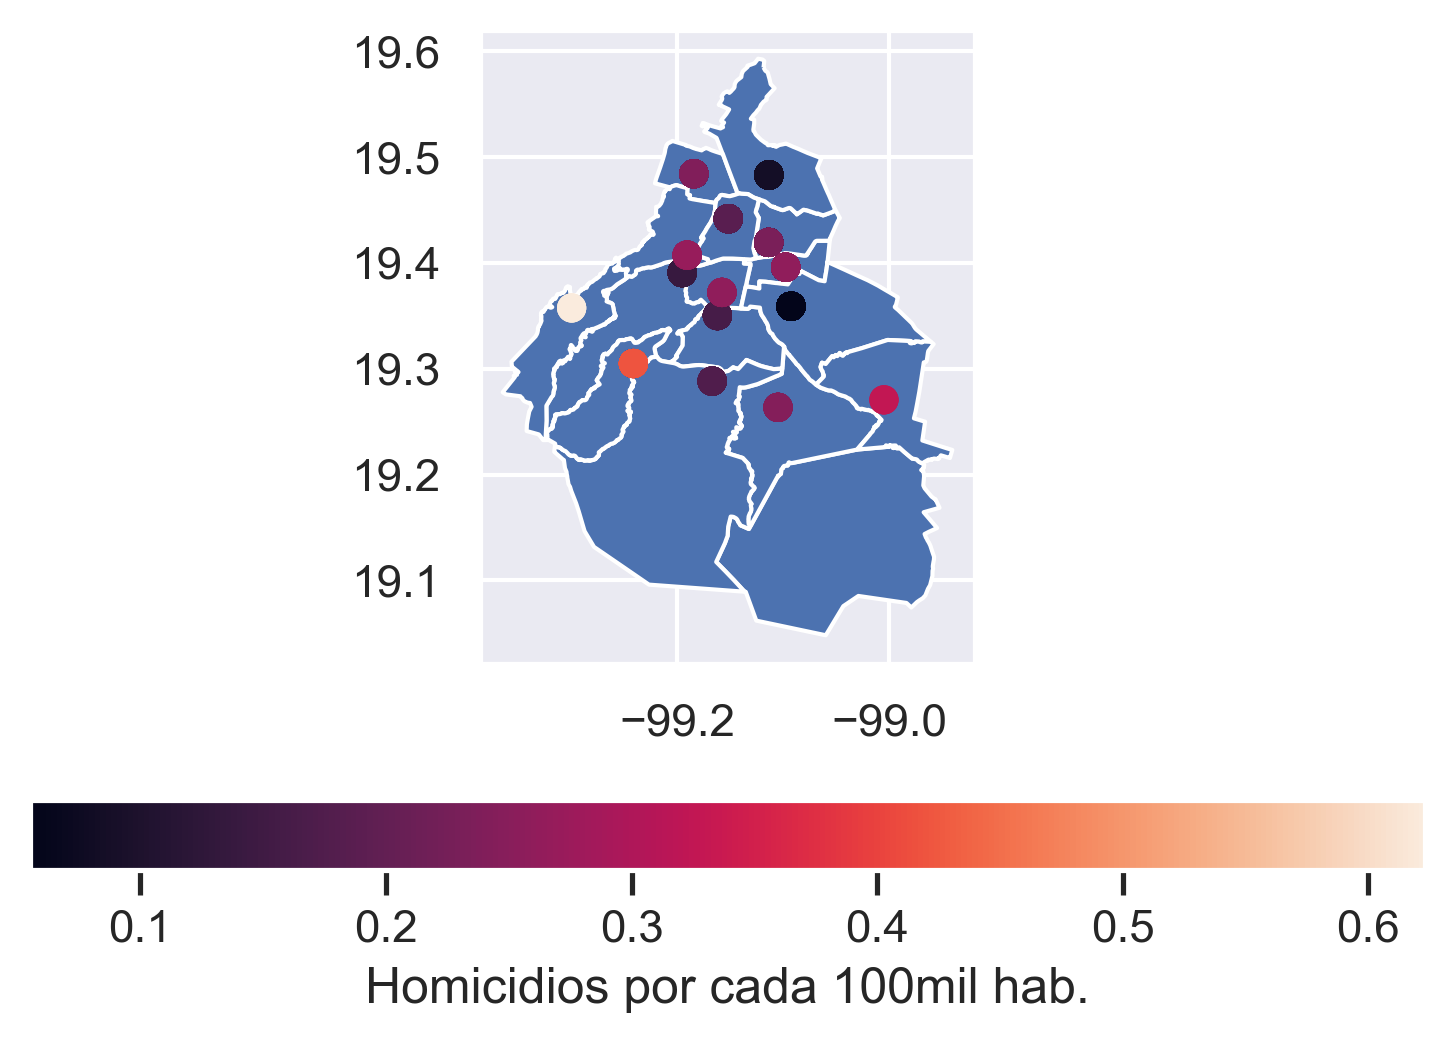

In [63]:
ax = map_df.plot()
gdf.plot(ax = ax,
         column = 'Homicidios por 100mil hab.', 
         legend = True,
         legend_kwds = {'label':'Homicidios por cada 100mil hab.', 'orientation':'horizontal'})
plt.show()

**10-** ¿Cómo diseñarías un indicador que midiera el nivel "inseguridad"? Diséñalo al nivel de disagregación que te parezca más adecuado. (ej. manzana, calle, AGEB, etc). 

Lo primero que hacemos es separar un *DataFrame* al que llamaremos *delitos_df*, para convertir de nuevo las fechas en objetos con los que Python pueda trabajar:

In [ ]:
delitos_df = datos_df
delitos_df = delitos_df[datos_df['fecha_hechos'].notna()]
delitos_df = delitos_df[~delitos_df['fecha_hechos'].isin(['NA NA'])]
delitos_df = delitos_df[~delitos_df['fecha_hechos'].isin(['0000-00-00 00:00:00'])]
delitos_df['fecha_hechos'] = delitos_df['fecha_hechos'].str.replace('/', '-')
delitos_df['fecha_hechos'] = pd.to_datetime(delitos_df['fecha_hechos'], yearfirst = True)
delitos_df['fecha_hechos'] = delitos_df.fecha_hechos.apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
delitos_df['fecha_hechos'] = pd.to_datetime(delitos_df['fecha_hechos'], format = '%Y-%m-%d %H:%M:%S')
delitos_df = delitos_df.set_index('fecha_hechos')
delitos_df.sort_index()
delitos_df.head()

Vamos a utilizar valores superiores al año $2015$:

In [ ]:
delitos_df = delitos_df.loc['2015-01-01':]
delitos_df = delitos_df.sort_index()
delitos_df = delitos_df[['delito', 'categoria_delito', 'alcaldia_hechos', 'colonia_hechos']]

In [ ]:
delitos_df['categoria_delito'] = delitos_df['categoria_delito'].str.replace('Ã\x8d', 'Í').str.replace('Ã“', 'Ó').str.replace('Ãš', 'Ú')
delitos_df['colonia_hechos'] = delitos_df['colonia_hechos'].str.replace('Ã“', 'Ó').str.replace('1', '1°').str.replace('1Â°', '1°').str.replace('1ø', '1°').str.replace('Ã', 'Á').str.replace('Ã', 'Á').str.replace('RÃC', 'RÍC').str.replace('TÃS', 'TÍS') 

El primer criterio que utilizaremos es el relacionado con la categoría del delito, daremos una escala del $0$ al $20$ para discriminar los diferentes niveles del delito, el cual quedará registrado en el *DataFrame* *Nivel*:

In [ ]:
lista_delitos = delitos_df.value_counts('categoria_delito').to_frame('Frecuencia').index.to_list()

In [ ]:
Nivel = pd.DataFrame(index = range(len(lista_delitos)), columns = ['delitos', 'Nivel'])
Nivel['delitos'] = lista_delitos
Nivel['Nivel'] = [5, 10, 10, 5, 15, 10, 10, 20, 20, 20, 10, 15, 15, 15, 10, 20]

In [ ]:
Nivel = Nivel.sort_values(by = 'Nivel')
Nivel = Nivel.set_index('delitos')

Adicionalmente, utilizaremos el hecho que ciertas alcaldías poseen mayores densidades de delitos que otras, lo que también nos permite dar una escala para cada una de ellas, la cual quedará registrada en el *DataFrame* *Densidad*:

In [ ]:
lista_alcaldias = delitos_df.value_counts('alcaldia_hechos').index.to_list()[0:16]

In [ ]:
densidad = pd.DataFrame(index = range(len(lista_alcaldias)), columns = ['alcaldia', 'densidad'])
densidad['alcaldia'] = lista_alcaldias
densidad['densidad'] = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
densidad = densidad.set_index('alcaldia')

In [ ]:
delitos_df['Nivel'] = delitos_df['categoria_delito'].map(Nivel['Nivel'])
delitos_df['Densidad'] = delitos_df['alcaldia_hechos'].map(densidad['densidad'])

In [ ]:
delitos_df.head()

Estableceremos de esta manera la disagregación por colonias dando el conteo total de delitos en cada colonia como el primer indicador de delitos, el promedio de los niveles de delitos establecidos (con el entero más cercano) y la mediana de la densidad:

In [ ]:
categoria_df = pd.pivot_table(delitos_df, 
                              index = 'colonia_hechos', 
                              aggfunc = {'delito':'count', 'Nivel':'mean', 'Densidad':'median'})
categoria_df['Nivel'] = categoria_df['Nivel'].to_numpy()
categoria_df['Nivel'] = np.rint(categoria_df['Nivel'])

Así pues, el *DataFrame* *categoria_df* nos dará los tres indicadores de delito por colonia: *Densidad*, *Nivel* y *conteo total de delitos*:

In [ ]:
categoria_df = categoria_df.fillna(0)
categoria_df.head()

**11-** Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (Pista: Puedes usar algoritmos de Machine Learning no supervisados)
    **a)** ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

In [ ]:
categoria_arreglo = categoria_df.to_numpy()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_reduced = TSNE(n_components=2, perplexity = 15).fit_transform(categoria_arreglo)

In [ ]:
X_reduced.shape

In [ ]:
import seaborn as sns
categoria_df['tsne-2d-one'] = X_reduced[:, 0]
categoria_df['tsne-2d-two'] = X_reduced[:, 1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Densidad",
    data = categoria_df,
    legend="full",
    alpha=0.3
)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "tsne-2d-one", y = "tsne-2d-two",
    hue = "Nivel",
    palette = sns.color_palette("hls", 10),
    data = categoria_df,
    legend="full",
    alpha=0.3
)

A partir de la figura podemos apreciar que no existen concentraciones apreciables que dependan de la Densidad de la alcaldía en donde se encuentra la colonia, puesto que para todas las agrupaciones mostradas en la primera figura tenemos que las densidades se reparten de manera uniforme. De modo contrario, vemos que para la gráfica que muestra el nivel de los delitos, tenemos una concentración de los delitos de mayores niveles, es decir, de nivel $20$ y $15$, lo que implica que para este criterio de crimen tenemos gran concentración en ciertas colonias. 

In [ ]:
categoria_df['Nivel'][categoria_df['Nivel'] == 20]

In [ ]:
categoria_df['Nivel'][categoria_df['Nivel'] == 15]

Los datos así nos muestran una gran concentración de delitos alrededor de las colonias *Tlaxcala centro* y *Manantiales*.

**12-** Toma los delitos clasificados como "Robo a pasajero a bordo de transporte público con o sin violencia". ¿Cuáles son las rutas de transporte público donde más ocurren estos delitos?

In [ ]:
delitos_df = datos_df
delitos_df = delitos_df[datos_df['fecha_hechos'].notna()]
delitos_df = delitos_df[~delitos_df['fecha_hechos'].isin(['NA NA'])]
delitos_df = delitos_df[~delitos_df['fecha_hechos'].isin(['0000-00-00 00:00:00'])]
delitos_df['fecha_hechos'] = delitos_df['fecha_hechos'].str.replace('/', '-')
delitos_df['fecha_hechos'] = pd.to_datetime(delitos_df['fecha_hechos'], yearfirst = True)
delitos_df['fecha_hechos'] = delitos_df.fecha_hechos.apply(lambda x: pd.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
delitos_df['fecha_hechos'] = pd.to_datetime(delitos_df['fecha_hechos'], format = '%Y-%m-%d %H:%M:%S')
delitos_df = delitos_df.set_index('fecha_hechos')
delitos_df = delitos_df.sort_index()
delitos_df = delitos_df.loc['2015-01-01':]
delitos_df.head()

In [ ]:
BusDelitos_df = delitos_df[delitos_df['categoria_delito'].str.contains('MICROBUS')]

In [ ]:
BusDelitos_df.head()

In [ ]:
BusDelitos_df.value_counts('colonia_hechos').to_frame('Frecuencia').iloc[0:5]

 A partir de la obtención de las colonias en donde se registran más robo a pasajeros a bordo de microbuses (peceros), tenemos que las rutas que más sufren de este delito son las que transitan por:
 - Agrícola Pantitlán.
 - Unidad Ejército Constitucionalista.
 - Santa Martha Acatitla.
 - Ermita Zaragoza.
 - Santa Cruz Meyehualco. 